# Assignment 1. Student Performance Index

In this assignment, we will build models to predict student's performance. We will be using the "Student Performance Dataset" a dataset which includes student grades, demographic, social and school related features that has been collected by using school reports and questionnaires.
You can download the dataset from the moodle. You can also read on the dataset from [the UCI Machine Learning Repository](https://archive.ics.uci.edu/dataset/320/student+performance).

Our target value will be the student's performance in the end of the year which is marked 'G3' in the dataset. In the first part of the assignment you will be writing a linear regression model to predict the students grade at the end of the year. In the second part of the assignment you will build a classifier which predicts if the student's performance at the end of the year will be above average.

The assignment includes two files.
1. This file (ML_DL_Assignment1.ipynb)
2. A python utils file which you will fill out (ML_DL_Functions1.py)

As well as the student performance dataset file.

In this assignment you will mount and load the dataset and functions file from google drive. To start make sure you have both the template python functions file and the student dataset file on the same directory in your google drive.


**IMPORTANT:**
When you are finished with the assignment make sure you submit both ipynb file and the functions file flat (**NOT inside a directory**). Do not change the files names(ML_DL_Assignment1.ipynb, and ML_DL_Functions1.py). This is crucial and can cause your code to not run in the testing.

In [1]:
import pandas
import numpy as np
import matplotlib.pyplot as plt
import sys


To make sure that you always have the newest version of your functions file(even if it changes whilst working on the assignment) we provided you with a reload function:

In [2]:
def reload_functions():
  if 'ML_DL_Functions1' in sys.modules:
    del sys.modules['ML_DL_Functions1']
  functions_path = drive_path.replace(" ","\ ") + 'ML_DL_Functions1.py'
  !cp $functions_path .

## 1. The Data



### 1.1 Load your dataset from the google drive
Start by setting up a Google Colab notebook in which to do your work.
you might find this link helpful:

- https://colab.research.google.com/github/googlecolab/colabtools/blob/master/notebooks/colab-github-demo.ipynb


To process and read the data, we use the popular `pandas` package for data analysis.

Now that your notebook is set up, we can load the data into the notebook. You will need to upload the "student-mat.csv" dataset and the functions file("ML_DL_Functions1.py") to a directory in google drive and mount your Google Drive to the colab notebook.

Here are some resources to help you get started:

[http://colab.research.google.com/notebooks/io.ipynb](https://colab.research.google.com/notebooks/io.ipynb)

In [3]:
from google.colab import drive
import sys
drive.mount('/content/gdrive')

drive_path = '/content/gdrive/My Drive/Intro_to_Deep_Learning/Assignment1/' # TODO - UPDATE ME WITH THE TRUE PATH!


print("looking for dataset in: "+drive_path+'student-mat.csv')
df = pandas.read_csv(drive_path+'student-mat.csv')
df = df.sample(frac=1, random_state= 10) # This line scrambles the order of the dataframe

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).
looking for dataset in: /content/gdrive/My Drive/Intro_to_Deep_Learning/Assignment1/student-mat.csv


Now that the data is loaded to your Colab notebook, you should be able to display the Pandas
DataFrame `df` as a table:

In [4]:
df

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
322,GP,F,17,U,GT3,T,3,1,services,services,...,3,4,3,2,3,5,1,12,14,15
227,GP,F,18,U,GT3,T,2,3,at_home,other,...,4,3,3,1,2,3,4,11,10,10
323,GP,M,17,U,GT3,T,2,1,other,other,...,5,4,5,1,2,5,0,5,0,0
113,GP,M,15,U,LE3,A,2,1,services,other,...,4,5,5,2,5,5,0,8,9,10
80,GP,M,16,U,LE3,T,4,3,services,other,...,5,4,2,1,2,5,10,15,15,15
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
123,GP,M,15,U,GT3,T,4,3,teacher,other,...,5,4,3,1,2,3,2,10,10,11
320,MS,M,19,R,GT3,T,1,1,other,services,...,5,4,4,3,3,2,8,8,7,8
15,GP,M,17,U,GT3,T,3,3,other,other,...,4,3,4,1,4,4,4,6,5,6
125,GP,F,16,U,GT3,T,3,2,other,other,...,1,2,2,1,2,1,14,12,13,12


Notice that the data consists of multiple types. There are numeric columns such as 'age','freetime' and 'G3' but there are also a few categorical columns for example 'school','address','Mjob' etc. Since we want to use a numeric estimator we need all our data to be numeric. We can use indicators to translate the categories into numeric values. In the pandas library it is done using the [get_dummies](https://pandas.pydata.org/docs/reference/api/pandas.get_dummies.html) function.

Notice that in this assignment we will not be using any multiple category columns (to simplify the task a bit) so we remove the columns 'Mjob', 'Fjob', 'reason' and 'guardian'.

In [5]:
df_no_multi_categorical = df.drop(["Mjob","Fjob","reason","guardian"],axis=1)
df_numerical = pandas.get_dummies(df_no_multi_categorical, drop_first=True)

Notice how each categorical column has been converted to a binary numerical value.

In [6]:
df_numerical

,age,Medu,Fedu,traveltime,studytime,failures,famrel,freetime,goout,Dalc,...,famsize_LE3,Pstatus_T,schoolsup_yes,famsup_yes,paid_yes,activities_yes,nursery_yes,higher_yes,internet_yes,romantic_yes
322,17,3,1,1,3,0,3,4,3,2,...,0,1,0,1,0,0,0,1,1,0
227,18,2,3,1,3,0,4,3,3,1,...,0,1,0,1,0,0,1,1,1,0
323,17,2,1,1,1,3,5,4,5,1,...,0,1,0,1,0,0,1,1,1,0
113,15,2,1,4,1,3,4,5,5,2,...,1,0,0,0,0,0,1,1,1,0
80,16,4,3,1,2,0,5,4,2,1,...,1,1,0,1,1,1,1,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
123,15,4,3,2,2,0,5,4,3,1,...,0,1,0,1,1,0,1,1,1,0
320,19,1,1,3,2,3,5,4,4,3,...,0,1,0,0,0,0,1,1,1,0
15,17,3,3,1,2,0,4,3,4,1,...,0,1,0,0,0,1,0,1,1,0
125,16,3,2,1,2,0,1,2,2,1,...,0,1,0,1,1,0,1,1,1,0


### 1.2 Prepare the data
Splitting a dataset into training and testing sets is a common practice in machine learning. The primary reason for doing so is to evaluate the performance of a model on unseen data. By splitting the dataset into training and testing sets, we can train our model on the training set and evaluate its performance on the testing set.

In this assignment the code used to prepare the data is already given to you


In [7]:
df_train = df_numerical[:270]
df_test = df_numerical[270:]

It can also be beneficial to **normalize** the columns, so that each column (feature)
has the *same* mean and standard deviation.

In [8]:
feature_means = df_train.mean().to_numpy()
feature_stds  = df_train.std().to_numpy()
feature_stds[feature_stds==0] = 0.01
train_norm = (df_train - feature_means) / feature_stds
test_norm = (df_test - feature_means) / feature_stds

#### Food for thought:
*Notice how in our code, we normalized the test* *set using the training data means and standard* *deviations. This is not a bug.Why would it would* *be improper to compute and use test set means and* *standard deviations. (Hint: Remember what we want* *to use the test accuracy to measure.)*



Finally we split the labels and the features of the dataset into seperate matrices.

In [9]:
# convert to numpy
train_x = train_norm.drop("G3",axis=1).to_numpy()
train_s = train_norm["G3"].to_numpy()
test_x = test_norm.drop("G3",axis=1).to_numpy()
test_s = test_norm["G3"].to_numpy()

### 1.3 check for correlation between the variables in the input
before you start fitting models to the data it is important to understand it. calculate and show (in whatever way fits you) the correlation between each of the input parameters('age','Medu','Fedu','traveltime', etc) and the predicted parameter 'G3')
you can use the [seaborn](https://seaborn.pydata.org/) library to aid you in this.

<ipython-input-10-05724a4276c4>:4: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = df.corr()


<function matplotlib.pyplot.show(close=None, block=None)>

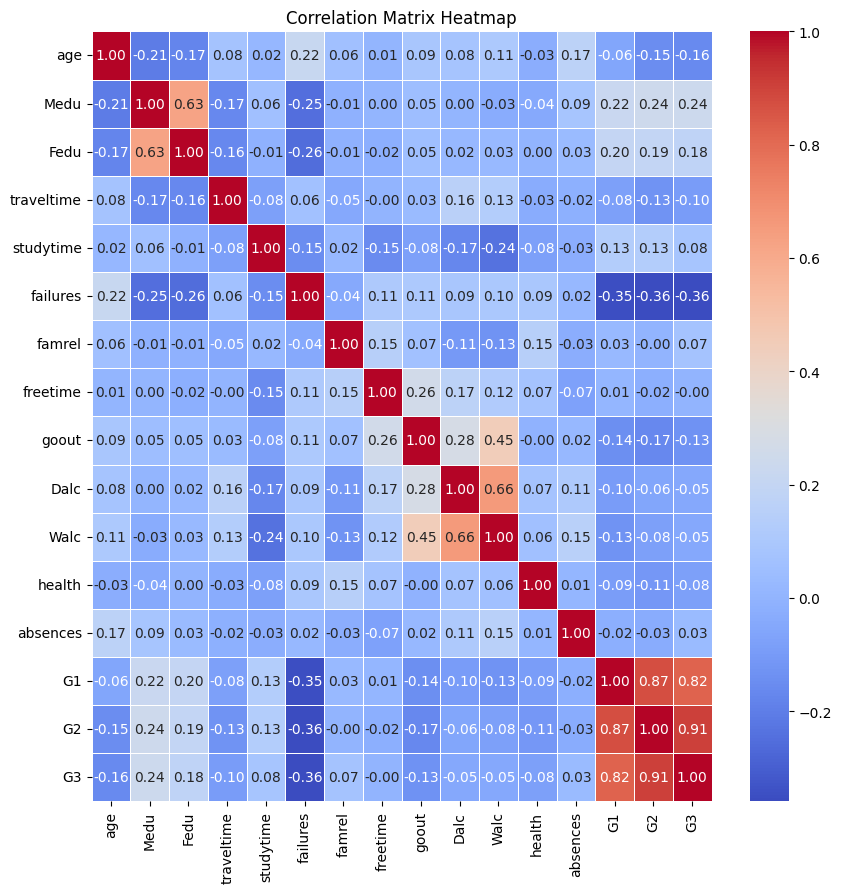

In [10]:
import seaborn as sn
import matplotlib.pyplot as plt
# Insert your code  here
correlation_matrix = df.corr()
plt.figure(figsize=(10,10))
sn.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Correlation Matrix Heatmap")
plt.show

#### Food for thought:
*what can you learn from this test? are all input* *parameters equally important? which ones could you omit? which two variables are the best predictor of student performance at the end of the year and why?*



# My Answer
I can learn from this test that not all the parameters are important most of the parameters aren't important to the predicted parameter G3.
I can omit the freetime parameter because it has a 0 correlation with G3.
A correlation coefficient of 0 indicates no linear correlation.
The two best predictor variables of student performance at the end of the year are G1 and G2 because their correlations with G3 are the biggest in absolute value. We can see this in the red lower square on the right

## 2. Linear regression
The first task you are going to tackle is Linear regression. In this task we will predict a students performance according to his different parameters.


### 2.1 Fit a linear model
 you can use the LinearRegression class from sklearn.linear_model. you can read more on it on:

 https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html


In [11]:
from sklearn.linear_model import LinearRegression

reg = LinearRegression()
# Insert your code here
reg.fit(train_x,train_s)
print(reg.score(train_x,train_s))


0.8438006276192496


### 2.2 Test the accuracy of the model
There are several ways to measure the accuracy of a linear regression model. test your model using the '[predict](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html)' function on the test set. you can measure the accuracy using MSE:

$MSE= \sum(s-\hat{s})^2$

or using the $R^2$ value:

$1-\frac{\text{unexplained variance=MSE}}{Total Variation}=1-\frac{\sum(s-\hat{s})^2}{\sum(s-\bar{s})^2}$

you can read on it further [here](https://en.wikipedia.org/wiki/Coefficient_of_determination).

In [12]:
# Insert your code here
from sklearn.metrics import mean_squared_error

predictions = reg.predict(test_x)
print("Predict:\n", predictions)
print("R^2:\n", reg.score(test_x,test_s))
print("MSE: \n", mean_squared_error(test_s, predictions))

Predict:
 [ 1.17149935 -1.12146441 -0.98420003 -0.14542565  0.72997533  0.80911143
  0.45020963  0.81402471  0.4035366   0.08972628 -0.91882555  1.25529176
  1.71408614 -0.77535807 -0.04567919 -0.33784271  0.63853461 -1.60201483
 -2.6864557  -2.42911999  0.47459417  0.33823764  0.1499771   0.39085843
  0.60024863  0.1346155  -1.08318968  0.64571356  0.61305712  1.04488039
 -2.93920675  1.38003402 -0.15530602 -0.02122199 -0.20414482 -0.07885326
  1.09622038 -0.52223207  0.41922377  0.5887981  -0.11482829 -1.39401331
  0.75843484  1.69079276 -0.03612223  0.16978595 -0.61729168 -0.58178408
  0.79178143 -0.53741601 -2.24654251 -0.26451351  0.15362421  0.56722456
 -0.33568938 -0.40129219 -1.25239991  1.9302784  -0.37037909 -0.60703032
 -0.21271115 -0.71583391 -1.24890945 -0.46522793 -2.33404093 -0.02669874
 -0.89568305 -1.37279353  0.30568837 -0.2653491 ]
R^2:
 0.8538910740602528
MSE: 
 0.13913103672500796


If everything went correctly you should get an MSE value of around 0.11 and around 0.87 for $R^2$ .

### 2.3 save the parameters of the model

- Run the code block below.
- copy the coefficients list and paste it in the return value of the function 'linear_regression_coeff_submission' in the functions file **in your google drive**.
- copy the intercept value and paste it in the return value of the function 'linear_regression_intrcpt_submission' in the function file **in your google drive**.

THESE VALUES WILL BE USED TO GRADE YOU SO MAKE SURE YOU COPIED THEM CORRECTLY

In [13]:
coef = reg.coef_
intrcpt = reg.intercept_
print("coefficients: ")
print(coef.tolist())
print("intercept: ")
print(intrcpt)

coefficients: 
[-0.060275098863884574, 0.0164227259556691, -0.02661181214278923, 0.00864438831110523, -0.03969022274428453, -0.018151809502529804, 0.0893324721880855, -0.017020070103715295, 0.04055325941849598, -0.03313583624821699, 0.03538793016988223, 0.007479107125564478, 0.08666236718897556, 0.1582478949262071, 0.7650690151627796, 0.036791879166358746, 0.020924188500499846, 0.009370445239890855, 0.025221747265943523, -0.006431296481186966, 0.05092962098616309, 0.015228656319622634, 0.0025763781832655423, -0.037961188241101985, -0.028388276317477035, 0.043027987720183916, -0.018778655271298576, -0.029390924829043312]
intercept: 
2.0709601051017953e-16


To make sure you copied the values correctly you can run the following block:

In [14]:
reload_functions()
import ML_DL_Functions1
if abs(ML_DL_Functions1.linear_regression_coeff_submission() - coef).sum()>(10**(-6)):
  print("Coefficients were NOT copied correctly")
elif ML_DL_Functions1.linear_regression_intrcpt_submission() != intrcpt:
  print("Intercept Value was NOT copied correctly")
else:
  print("copied correctly")

copied correctly


### 2.4 test your skills in Linear algebra and compare the result to sklearn
While using Sklearn's built in linear regression is easy it is also important to see that it is not too complicated to write the regression by yourself. In class you were tought that the linear regression could be estimated using the Least Squares method. The Psudo-Inverse is defined as
$\theta^* = (X^TX)^{-1}X^Ts$. Use this knowledge to write the linear regression yourself. Fill in the LeastSquares function in the functions file.
In this function you are not allowed to use the sklearn or scipy libraries.

In [15]:
import scipy

from copy import deepcopy
reload_functions()
import ML_DL_Functions1
theta = ML_DL_Functions1.LeastSquares(train_x,train_s)

Test the accuracy of the model, as in 2.2

In [16]:
# Insert your code here
X_test_b = np.c_[np.ones((test_x.shape[0], 1)), test_x]    # Add a column of ones to X for the bias term
predictions_ls = np.dot(X_test_b, np.transpose(theta))
r2_ls = 1 - mean_squared_error(test_s, predictions_ls) / np.var(test_s)
mse_ls = mean_squared_error(test_s, predictions_ls)
print("Predict:\n", predictions_ls)
print("My model, R^2:\n", r2_ls)
print("My model, MSE: \n", mse_ls)

Predict:
 [ 1.17149935 -1.12146441 -0.98420003 -0.14542565  0.72997533  0.80911143
  0.45020963  0.81402471  0.4035366   0.08972628 -0.91882555  1.25529176
  1.71408614 -0.77535807 -0.04567919 -0.33784271  0.63853461 -1.60201483
 -2.6864557  -2.42911999  0.47459417  0.33823764  0.1499771   0.39085843
  0.60024863  0.1346155  -1.08318968  0.64571356  0.61305712  1.04488039
 -2.93920675  1.38003402 -0.15530602 -0.02122199 -0.20414482 -0.07885326
  1.09622038 -0.52223207  0.41922377  0.5887981  -0.11482829 -1.39401331
  0.75843484  1.69079276 -0.03612223  0.16978595 -0.61729168 -0.58178408
  0.79178143 -0.53741601 -2.24654251 -0.26451351  0.15362421  0.56722456
 -0.33568938 -0.40129219 -1.25239991  1.9302784  -0.37037909 -0.60703032
 -0.21271115 -0.71583391 -1.24890945 -0.46522793 -2.33404093 -0.02669874
 -0.89568305 -1.37279353  0.30568837 -0.2653491 ]
My model, R^2:
 0.8538910740602532
My model, MSE: 
 0.1391310367250075


## 3. Linear classification
In this section you will be classifying wether a students performance in the end of the year was above average or not according to all other metrics.

### 3.1 prepare the data: split the dataset between students with grades above average and below and then split again for train test

To set up our data for classification, we'll use the "G3" field to represent whether a student achieved a performance above average or below. In our case `df_cl["G3"]` will be 1 if the students performance is above average and 0 otherwise.

In [17]:
from copy import deepcopy
df_cl = deepcopy(df_numerical)
print("average performance= "+ str(df_cl['G3'].mean()))
df_cl["G3"] = df["G3"].map(lambda x: int(x > 10))

average performance= 10.494117647058824


Next you need to normalize and split the dataframe into a training and test sets just like was done in part 1.2.

**Notice that when normalizing you do not normalize the labels**

In [18]:
# Insert your code here for normalizing and splitting the dataset for train and test
df_cl_train = df_cl[:270]
df_cl_test = df_cl[270:]
feature_means_cl = df_cl_train.mean().to_numpy()
feature_stds_cl  = df_cl_train.std().to_numpy()
feature_stds_cl[feature_stds_cl==0] = 0.01
train_norm_cl = (df_cl_train - feature_means_cl) / feature_stds_cl
test_norm_cl = (df_cl_test - feature_means_cl) / feature_stds_cl
train_cl_x = train_norm_cl.drop("G3",axis=1).to_numpy()
train_cl_s = df_cl_train["G3"].to_numpy()
test_cl_x = test_norm_cl.drop("G3",axis=1).to_numpy()
test_cl_s = df_cl_test["G3"].to_numpy()

### 3.2 Fit an svm model to the data to predict whether a grade is above or below average
Read on [the svm implementation of sklearn](https://scikit-learn.org/stable/modules/generated/sklearn.svm.LinearSVC.html). fit the model on the training classification dataset you built.

In [19]:
import sklearn.svm
svc = sklearn.svm.LinearSVC()

# Insert your code here:
svc.fit(train_cl_x,train_cl_s)

LinearSVC()

### 3.3 Test your model
For classification accuracy is usually calculated as the number of correct predictions divided by number of total predictions:
$$100*\frac{\text{Number of correct predicitions}}{\text{Number of total predictions}}$$

The accuracy is calculated on the test set. Fill in the accuracy function in the functions file and run the test below:

In [20]:
reload_functions()
import ML_DL_Functions1
ML_DL_Functions1.classification_accuracy(svc,test_cl_x,test_cl_s)

87.14285714285714

If everything worked correctly you should get an accuracy of around  90%

### 3.4 save the parameters of the model
- Run the code block below.
- copy the coefficients list and paste it in the return value of the function 'classification_coeff_submission' in the functions file **in your google drive**.
- copy the intercept value and paste it in the return value of the function 'classification_intrcpt_submission' in the functions file **in your google drive**.
- copy the classes value and paste it in the return value of the function 'classification_classes_submission' in the functions file **in your google drive**.

THESE VALUES WILL BE USED TO GRADE YOU SO MAKE SURE YOU COPIED THEM CORRECTLY

In [21]:
coef_cl = svc.coef_
intrcpt_cl = svc.intercept_
classes_cl = svc.classes_
print(coef_cl.tolist())
print(intrcpt_cl)
print(classes_cl.tolist())

[[-0.28920864009438985, -0.230811684431569, 0.3526679198263, -0.22996652670020062, -0.34075409918497945, 0.04550602623768541, -0.11659373011469486, -0.026418571226048338, 0.0928379707616084, 0.08738524803151185, -0.5304848954446387, 0.05314669730432251, -0.058999817184825144, 0.9783565995707971, 2.801053190969795, -0.40248136067304047, 0.11078785585568059, -0.061795867641137, -0.18161754201881683, -0.10948467745424026, 0.050801865435508804, 0.07000470478609956, 0.00975930117742559, -0.21020406271341346, -0.3990593042006408, 0.11622081471843333, 0.07535819279871829, 0.25549380988045844]]
[0.63711963]
[0, 1]


Make sure you copied your values correctly:

In [23]:
reload_functions()
import ML_DL_Functions1
if abs(ML_DL_Functions1.classification_coeff_submission() - coef_cl).sum()>(10**(-6)):
  print("Coefficients were NOT copied correctly")
elif ML_DL_Functions1.classification_intrcpt_submission()[0]- intrcpt_cl[0]>(10**(-6)):
  print("Intercept Value was NOT copied correctly")
elif (ML_DL_Functions1.classification_classes_submission() - classes_cl).sum()!=0:
  print("Intercept Value was NOT copied correctly")
else:
  print("copied correctly")

copied correctly
